In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
file_path='연령별인구현황.xlsx'

In [50]:
df=pd.read_excel(file_path, skiprows=3)

/home/whalstj1/.local/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [51]:
df.columns=df.columns.str.strip().str.replace('\n', '').str.replace('\r', '')

In [52]:
age_columns_total=['0~9세', '10~19세', '20~29세', '30~39세', '40~49세','50~59세', '60~69세', '70~79세', '80~89세', '90~99세', '100세 이상']
age_columns_male=[col+'.1' for col in age_columns_total]
age_columns_female=[col+'.2' for col in age_columns_total]

In [53]:
cols_to_numeric=['총 인구수','남 인구수','여 인구수']+age_columns_total+age_columns_male+age_columns_female
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

In [54]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [55]:
df = df.rename(columns={'행정기관':'Region','총 인구수':'Total Population'})

In [56]:
df['Region']=df['Region'].str.strip()

In [57]:
region_map = {
    '서울특별시': 'Seoul',
    '부산광역시': 'Busan',
    '대구광역시': 'Daegu',
    '인천광역시': 'Incheon',
    '광주광역시': 'Gwangju',
    '대전광역시': 'Daejeon',
    '울산광역시': 'Ulsan',
    '세종특별자치시': 'Sejong',
    '경기도': 'Gyeonggi',
    '강원특별자치도': 'Gangwon',
    '충청북도': 'Chungbuk',
    '충청남도': 'Chungnam',
    '전북특별자치도': 'Jeonbuk',
    '전라남도': 'Jeonnam',
    '경상북도': 'Gyeongbuk',
    '경상남도': 'Gyeongnam',
    '제주특별자치도': 'Jeju',
    '전국': 'Total'
}

In [58]:
df['Region']=df['Region'].map(region_map).fillna(df['Region'])

In [59]:
print(df['Region'].unique())

['Total' 'Seoul' 'Busan' 'Daegu' 'Incheon' 'Gwangju' 'Daejeon' 'Ulsan'
 'Sejong' 'Gyeonggi' 'Gangwon' 'Chungbuk' 'Chungnam' 'Jeonbuk' 'Jeonnam'
 'Gyeongbuk' 'Gyeongnam' 'Jeju']


/tmp/ipykernel_1470063/2138402873.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10,y='Region',x='Total Population',palette='Blues_r')


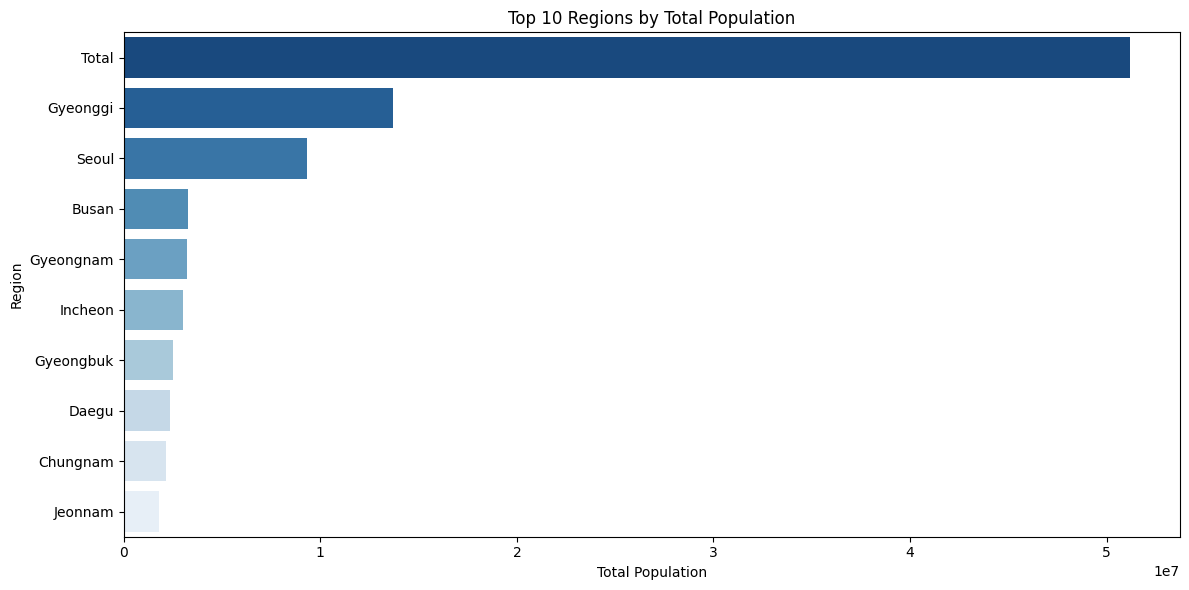

In [60]:
top10=df.sort_values(by='Total Population',ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top10,y='Region',x='Total Population',palette='Blues_r')

plt.title('Top 10 Regions by Total Population')
plt.xlabel('Total Population')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

In [61]:
age_map = {
    '0~9세':'0-9',
    '10~19세':'10-19',
    '20~29세':'20-29',
    '30~39세':'30-39',
    '40~49세':'40-49',
    '50~59세':'50-59',
    '60~69세':'60-69',
    '70~79세':'70-79',
    '80~89세':'80-89',
    '90~99세':'90-99',
    '100세 이상':'100+'}
age_labels_eng=[age_map.get(age, age) for age in age_total_sum.index]

/tmp/ipykernel_1470063/1862149703.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_labels_eng, y=age_total_sum.values, palette='coolwarm')


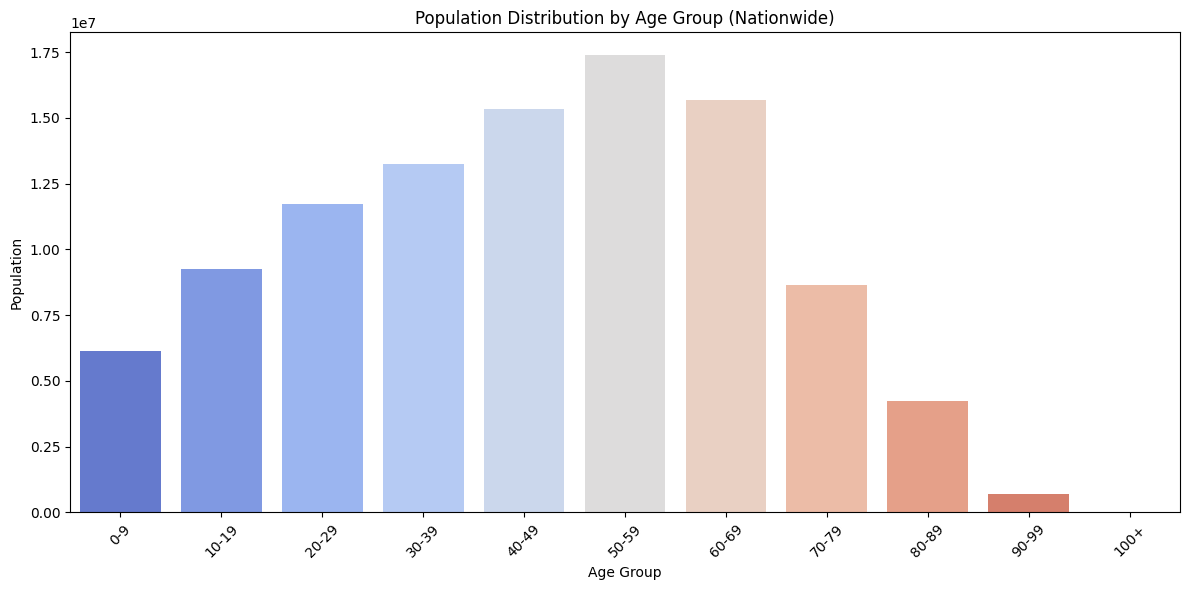

In [62]:
age_total_sum=df[age_columns_total].sum()
plt.figure(figsize=(12,6))
sns.barplot(x=age_labels_eng, y=age_total_sum.values, palette='coolwarm')
plt.title('Population Distribution by Age Group (Nationwide)')
plt.xlabel('Age Group')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

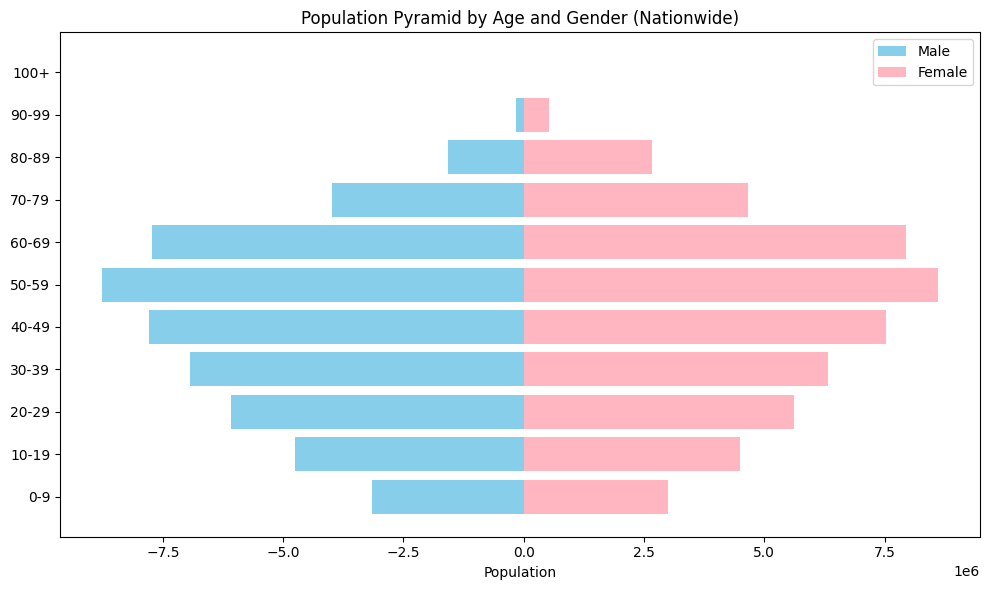

In [42]:
age_male=df[age_columns_male].sum()
age_female=df[age_columns_female].sum()

plt.figure(figsize=(10,6))
age_labels=age_columns_total

plt.barh(age_labels_eng,-age_male.values,color='skyblue',label='Male')
plt.barh(age_labels_eng,age_female.values,color='lightpink', label='Female')
plt.title('Population Pyramid by Age and Gender (Nationwide)')
plt.xlabel('Population')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [43]:
print(df.columns.tolist())

['행정기관코드', 'Region', 'Total Population', '연령구간인구수', '0~9세', '10~19세', '20~29세', '30~39세', '40~49세', '50~59세', '60~69세', '70~79세', '80~89세', '90~99세', '100세 이상', '남 인구수', '연령구간인구수.1', '0~9세.1', '10~19세.1', '20~29세.1', '30~39세.1', '40~49세.1', '50~59세.1', '60~69세.1', '70~79세.1', '80~89세.1', '90~99세.1', '100세 이상.1', '여 인구수', '연령구간인구수.2', '0~9세.2', '10~19세.2', '20~29세.2', '30~39세.2', '40~49세.2', '50~59세.2', '60~69세.2', '70~79세.2', '80~89세.2', '90~99세.2', '100세 이상.2']


In [45]:
age_cols_sample=['20~29세','30~39세','40~49세','50~59세','60~69세']

region_age_sum=df.groupby('Region')[age_cols_sample].sum()

/tmp/ipykernel_1470063/1721988033.py:6: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/whalstj1/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


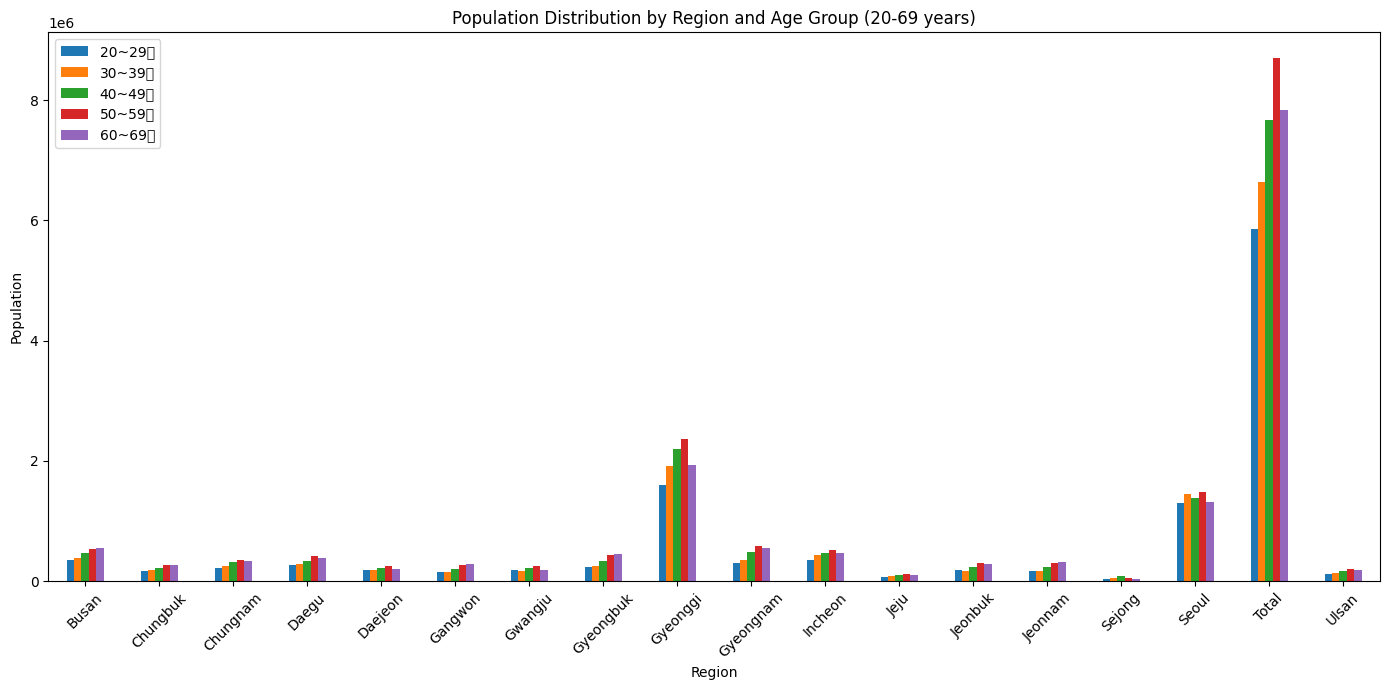

In [46]:
region_age_sum.plot(kind='bar', figsize=(14,7))
plt.title('Population Distribution by Region and Age Group (20-69 years)')
plt.xlabel('Region')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()